In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [34]:
df = pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Fire,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [35]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Fire', 'Region'],
      dtype='object')

In [36]:
## drop date , month and year columns
df.drop(['day', 'month', 'year'], axis=1, inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Fire,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [37]:
## independent and dependent features
X = df.drop('FWI', axis=1)
y = df['FWI']

In [38]:
## train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((182, 11), (61, 11), (182,), (61,))

In [40]:
## feature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Fire,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Fire,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


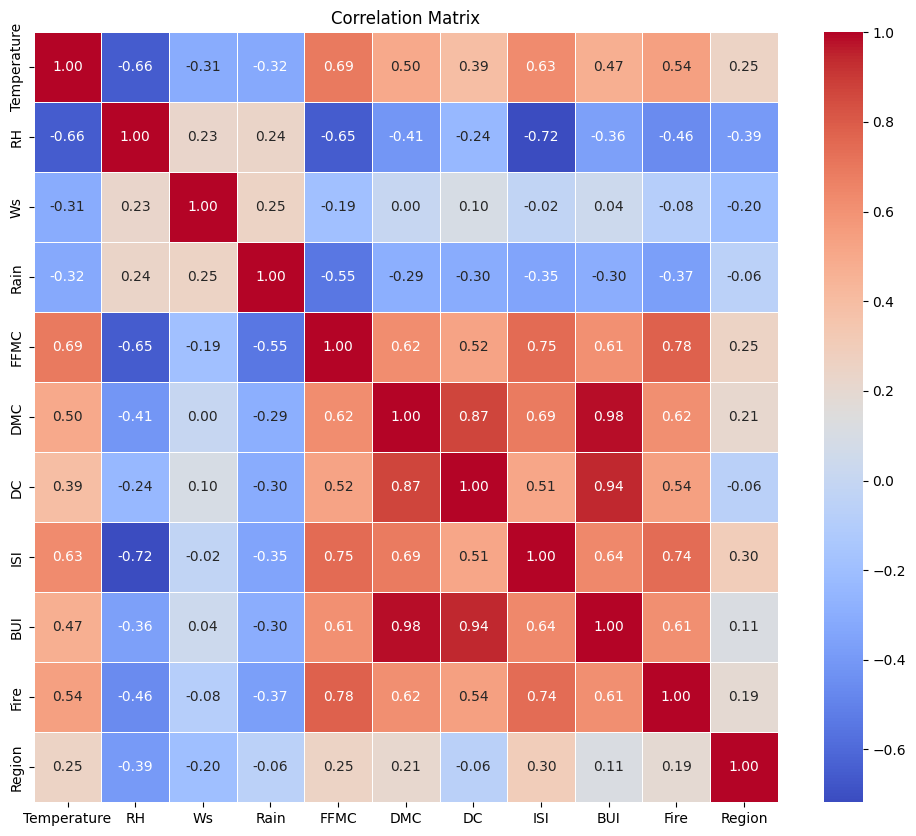

In [41]:
## check for multiple collinearity
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()  

## Remove the features who is highly positive corelated

In [42]:
def correlation (dataset , threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # we are interested in absolute values
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [43]:
highly_correlated = correlation(X_train, 0.85)

In [44]:
for col in highly_correlated:
    if col in X_train.columns:
        X_train.drop(col, axis=1, inplace=True)
        X_test.drop(col, axis=1, inplace=True)
print(X_train.shape, X_test.shape)

(182, 9) (61, 9)


### feature scalling 

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

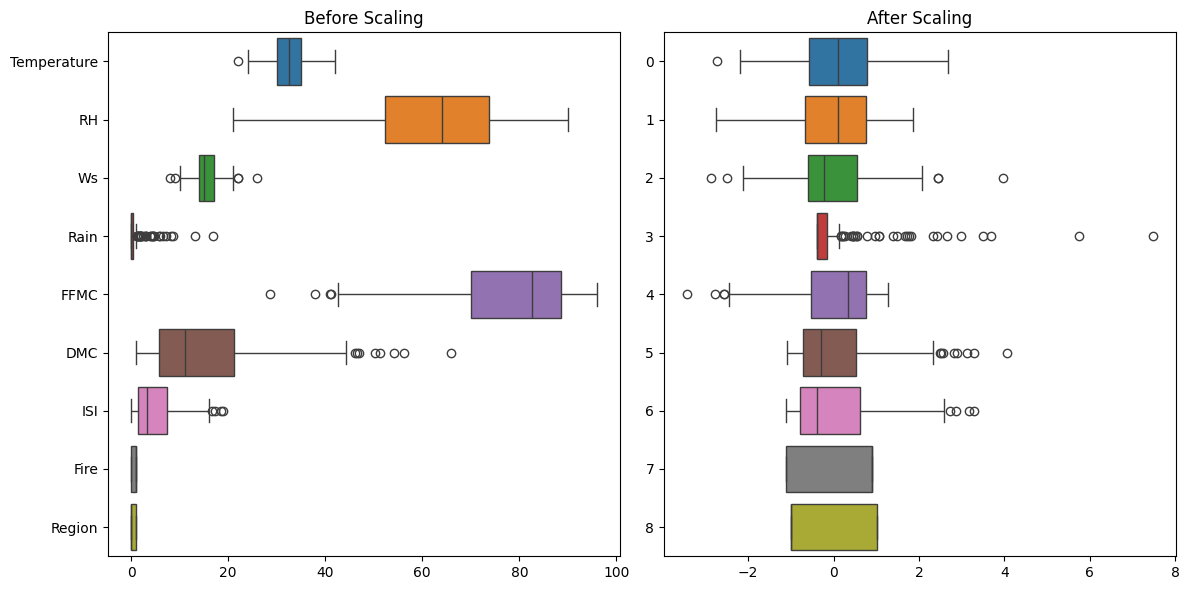

In [46]:
## Box plots to understand the effect of standard scaling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train, orient='h')
plt.title('Before Scaling')

plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled, orient='h')
plt.title('After Scaling')
plt.tight_layout()
plt.show()

## Linear regression model

Mean Absolute Error: 0.5468236465249987
R^2 Score: 0.9847657384266951


Text(0, 0.5, 'Predicted Values')

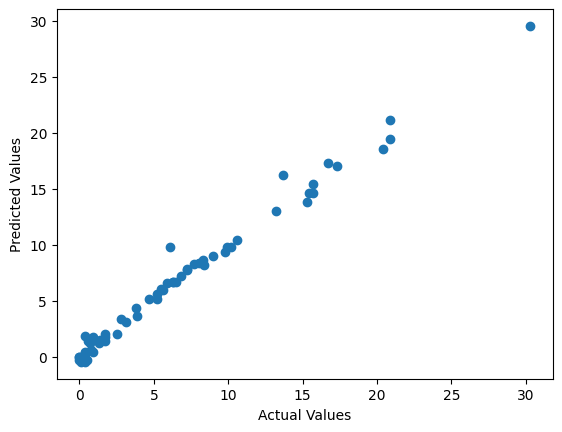

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
model = LinearRegression()
model.fit(X_train_scaled, y_train)
mae = mean_absolute_error(y_test, model.predict(X_test_scaled))
score = r2_score(y_test, model.predict(X_test_scaled))
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {score}')
plt.scatter(y_test, model.predict(X_test_scaled))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')  

## Lasso regration model

Mean Absolute Error: 1.133175994914409
R^2 Score: 0.9492020263112388


Text(0, 0.5, 'Predicted Values')

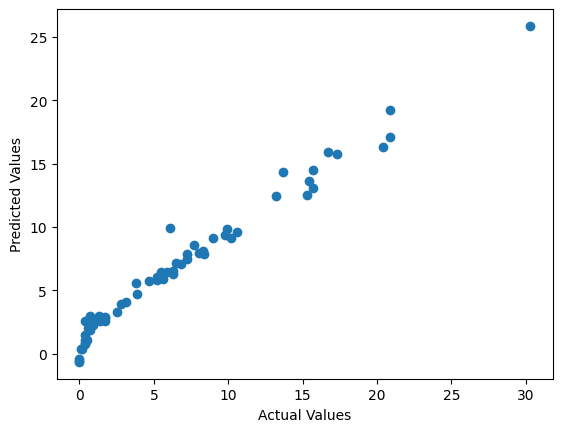

In [ ]:
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso.fit(X_train_scaled, y_train)
mae = mean_absolute_error(y_test, Lasso.predict(X_test_scaled))
score = r2_score(y_test, Lasso.predict(X_test_scaled))
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {score}')
plt.scatter(y_test, Lasso.predict(X_test_scaled))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')  

## Ridged Regression Model

Mean Absolute Error: 0.5642305340105713
R^2 Score: 0.9842993364555512


Text(0, 0.5, 'Predicted Values')

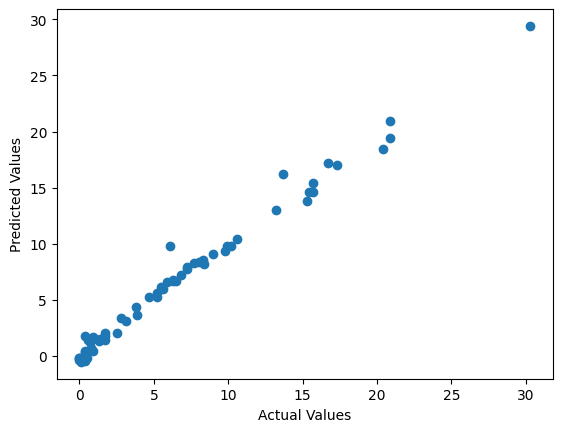

In [49]:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge.fit(X_train_scaled, y_train)
mae = mean_absolute_error(y_test, Ridge.predict(X_test_scaled))
score = r2_score(y_test, Ridge.predict(X_test_scaled))
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {score}')
plt.scatter(y_test, Ridge.predict(X_test_scaled))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')  

## Elasticnet Regression

Mean Absolute Error: 1.8822353634896
R^2 Score: 0.8753460589519703


Text(0, 0.5, 'Predicted Values')

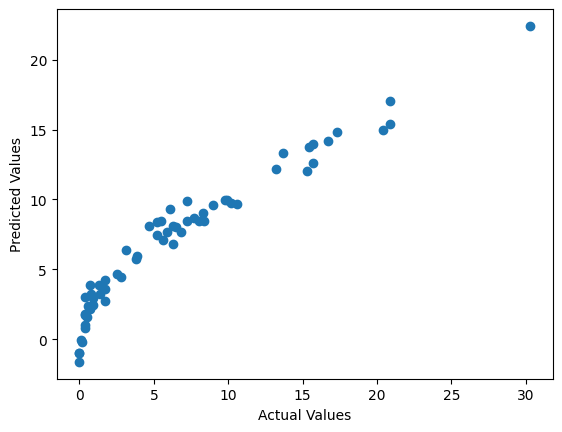

In [50]:
from sklearn.linear_model import ElasticNet
ElasticNet = ElasticNet()
ElasticNet.fit(X_train_scaled, y_train)
mae = mean_absolute_error(y_test, ElasticNet.predict(X_test_scaled))
score = r2_score(y_test, ElasticNet.predict(X_test_scaled))
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {score}')
plt.scatter(y_test, ElasticNet.predict(X_test_scaled))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')  

In [52]:
import pickle


In [53]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(Ridge, open('Ridge.pkl', 'wb'))